<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/DL/CNN/lec03_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6> lec03. MNIST
<pre>
* MNIST: Classify photos of handwritten digits (10 classes).
* Fashion-MNIST: Classify photos of items of clothing (10 classes).
* CIFAR-10: Classify small photos of objects (10 classes).
* CIFAR-100: Classify small photos of common objects (100 classes).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation                 #-------------FC
from keras.layers import Conv2D, MaxPooling2D,Flatten      #-------------CNN
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# from sklearn.datasets import load_boston
from keras.datasets     import mnist


# seed 고정

In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

# Data Load

In [ ]:
#ML : X_train, X_test, y_test, y_test = train_test_split()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # [(arr),(arr)]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# X 데이터 가공
* flatten()화 : 2D arr --> 1D arr
* 0 ~ 255 : 스케일링(MinMaxScaler)

In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 784)   #60000 28,28   -->  60000 784
# X_test  = X_test.reshape(X_test.shape[0], 784)     #10000 28,28   -->  10000 784

## 픽셀값 정규화

In [ ]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test  / 255.0

# y label 평준화
*  (integers in range 0-9)

In [ ]:
y_train_oh = to_categorical( y=y_train, num_classes=10, dtype='int32')
y_test_oh  = to_categorical( y=y_test, num_classes=10, dtype='int32')

In [ ]:
X_train.shape

(60000, 28, 28)

# CNN 모델 설계

<img src="https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=600>

In [ ]:
model = Sequential()
#---------------------------------CNN -------------------------------------------------------------
model.add(Conv2D(16, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5,5),  activation='relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# ------------------------------- FC -------- Affine ----------------------------------------------
model.add(Dense(units=64, activation='relu'))  #, input_dim=784   ,input_shape=(28*28,    )
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  #다중분류 예측(0~9)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

* model.compile : lom
* model.compile(loss ='',  optimizer='', metrics=[''])

* <font color=red><b> optimizer : back-propagation의 편미분한 값을 이용해 - 가중치 최적화
<pre>
gd(경사하강)
sgd(확률적 샘플링 경사하강)
momentum(가속도v*learn_rate), 
adagrade(피쳐별로 w다르게 조정), 
adam(momentum + adagrade)
rmsprop(..) 


* <font color=red><b> loss : 오류 (예측값-실제값) ----  1/n sum(잔차^2) -- 잔차제곱합의평균 ---- mse
              ( 모집단 - 샘플집단  = 모수(평균,분산) )
<pre>
회귀 : mse
분류 : 이진분류 손실함수(sigmoid)  ----- 손실값(cross entropy) class=2
         다중분류 손실함수(softmax)  ----- 손실값(cross entropy) class>2

<pre>
binary_crossentropy(원본값 둘중하나) : 0,1
sparse_crossentropy(원본값 n중 하나) : 0 ~ 9         
categorical_crossentropy(원핫인코딩) : 100000000 ~ 000000001    

In [ ]:
model.compile(loss ='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])  

# 학습 & 평가

* <font color=red><b> X는 스케일된 데이터, y는 원핫인코딩 데이터

In [ ]:
res = model.fit(X_train_scaler, y_train_oh, 
                epochs=30, 
                batch_size=128,        #128바이트씩 읽어라
                validation_split=0.1)  #학습:54만 ,  내부검증:6만

Epoch 1/30
422/422 [==============================] - 10s 22ms/step - loss: 0.4073 - accuracy: 0.8701 - val_loss: 0.1131 - val_accuracy: 0.9673
Epoch 2/30
422/422 [==============================] - 10s 23ms/step - loss: 0.1152 - accuracy: 0.9657 - val_loss: 0.0902 - val_accuracy: 0.9720
Epoch 3/30
422/422 [==============================] - 10s 24ms/step - loss: 0.0853 - accuracy: 0.9749 - val_loss: 0.0703 - val_accuracy: 0.9785
Epoch 4/30
422/422 [==============================] - 10s 24ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.0561 - val_accuracy: 0.9835
Epoch 5/30
422/422 [==============================] - 10s 25ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 6/30
422/422 [==============================] - 10s 24ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0500 - val_accuracy: 0.9863
Epoch 7/30
422/422 [==============================] - 10s 25ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0445 - val_accuracy:

In [ ]:
loss_categorical_crossentropy , metrics_accuracy = model.evaluate(X_test_scaler, y_test_oh)

313/313 [==============================] - 2s 6ms/step - loss: 0.0488 - accuracy: 0.9894


# 학습 평가 시각화

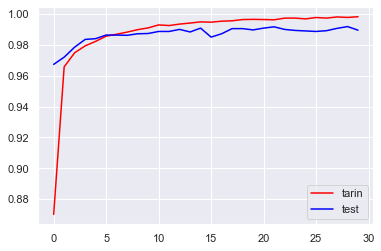

In [ ]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='tarin')
plt.plot(np.arange(len(res.history['accuracy'])), res.history['val_accuracy'], c='blue', label='test')
plt.legend()
plt.show()

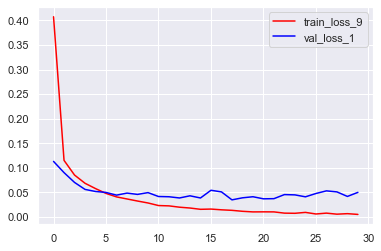

In [ ]:
plt.plot(np.arange(len(res.history['val_loss'])), res.history['loss'], c='red', label='train_loss_9')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss_1')
plt.legend()
plt.show()

# 오답 확인 (검증)

<font color=red><b>이미지 다룰 경우 픽셀 정규화 필수~!!!!!!!!
* 스케일링 전 : 335개 오답
* 스케일링 후 : 268개 오답

In [ ]:
proba = model.predict(X_test_scaler)
print(len(proba), proba[:2])

list = []
for arr in proba:
    list.append(np.argmax(arr))

ox_df = pd.DataFrame({"y_test":y_test , "pred":list})
ox_df.head()

10000 [[5.8727791e-16 1.6276077e-09 2.7036114e-12 2.1955465e-10 6.7889420e-14
  2.8822559e-14 3.4243250e-21 1.0000000e+00 1.0045301e-16 1.7495293e-12]
 [3.3373477e-09 6.4413200e-08 9.9999988e-01 2.0306266e-13 2.2873005e-17
  6.5459517e-19 7.2741656e-15 2.2801094e-13 6.8611965e-12 1.8771959e-16]]


,y_test,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
ox_idx_list = ox_df[ ox_df['y_test']!= ox_df['pred']].index
ox_idx_list

Int64Index([   8,  115,  340,  445,  448,  449,  582,  659,  684,  726,
            ...
            7472, 8094, 8326, 9015, 9642, 9664, 9679, 9729, 9770, 9792],
           dtype='int64', length=106)

## 335개 오답 중 100개만 보기

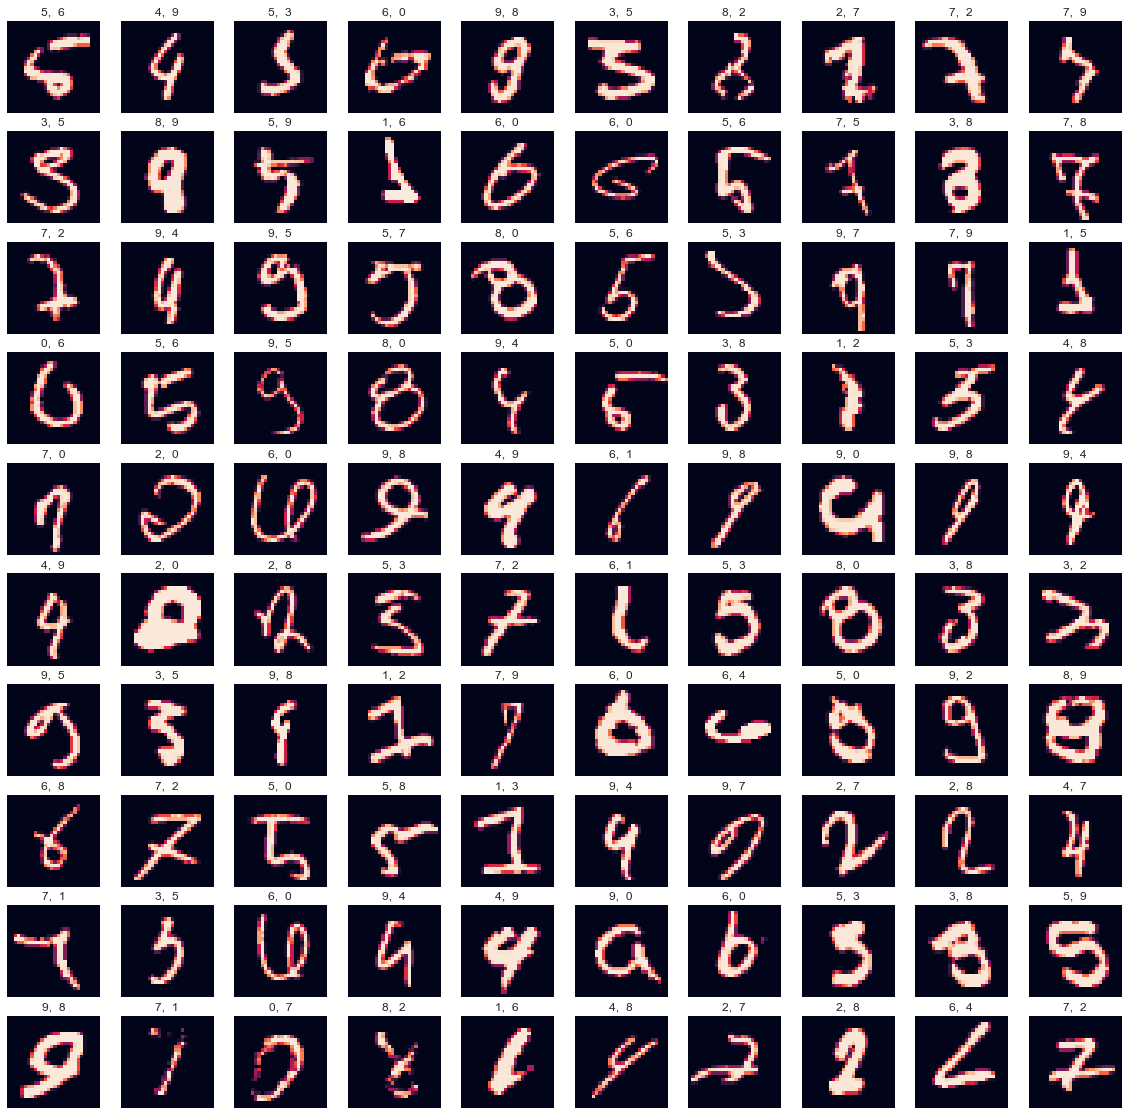

In [ ]:
p, axes = plt.subplots(10, 10, figsize=(20,20))

for i, idx in enumerate(ox_idx_list[:100]):
    r = i // 10
    c = i % 10
    axes[r][c].imshow(X_test_scaler[idx].reshape(28,28))   #, cmap=pyplot.get_cmap('gray'))
    axes[r][c].set_title(f"{y_test[idx]},  {ox_df.loc[idx]['pred']}")
    axes[r][c].axis('off')            #축 없에기
plt.show()